In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.sparse import diags 

# Computational Essay
By Roy Lim z5310629

### Part A
We can solve the Hamiltonian:
$$
    H = 
    \begin{bmatrix}
    E & t \\
    t* & -E \\ 
    \end{bmatrix}
$$
to get the following eigenvalues: $\lambda_1 = -\sqrt{t^2 + E^2} $, $\lambda_2 = \sqrt{t^2 + E^2}$ and given eigenvectors:
$$
    | \lambda_2 \rangle = 
    \begin{bmatrix}
        E - \sqrt{t^2 + E^2} \\ 
        t
    \end{bmatrix}
    | \lambda_2 \rangle = 
    \begin{bmatrix}
       E + \sqrt{t^2 + E^2} \\ 
       t 
    \end{bmatrix}
$$
Therefore $E_2 - E_1 = 2\sqrt{t^2 + E^2}$, min value for $E_2 - E_1$ is $2t$

For an energy state $| \lambda \rangle = \begin{bmatrix} a \\ b\end{bmatrix}$, the probability of being in state $|0\rangle$ and $|1\rangle$ is $|a|^2$ and $|b|^2$ respectively.
Note that $|a|^2 + |b|^2 = 1$ and that $t$ is real (meaning $t* = t$)

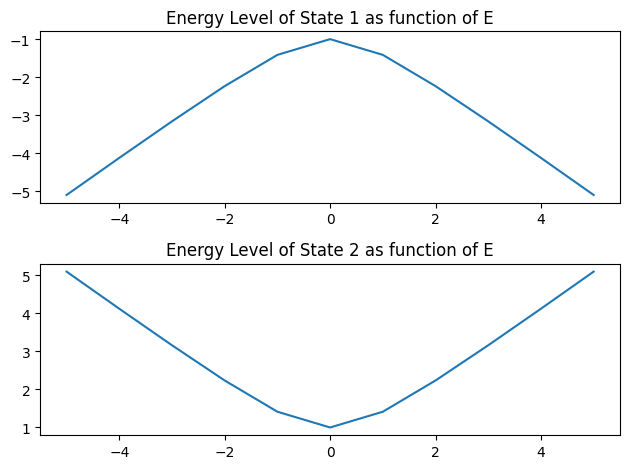

In [5]:
t = 1
E = [e for e in range(-5, 6)]
fig, axes = plt.subplots(2)
state1 = axes[0]
state2 = axes[1]
state1.plot([e for e in E], [-np.sqrt(t ** 2 + e ** 2)for e in E])
state1.set_title('Energy Level of State 1 as function of E')
state2.plot([e for e in E], [np.sqrt(t ** 2 + e ** 2)for e in E])
state2.set_title('Energy Level of State 2 as function of E')
plt.tight_layout()

In [6]:
# a = E, b = t
probability_matrix = [
    [
        lambda a, b: (a + np.sqrt(a ** 2 + b ** 2)) ** 2 / ((a + np.sqrt(a ** 2 + b ** 2)) ** 2 + b ** 2),
        lambda a, b:  b ** 2 / ((a + np.sqrt(a ** 2 + b ** 2)) ** 2 + b ** 2),
    ],
    [
        lambda a, b: (a - np.sqrt(a ** 2 + b ** 2)) ** 2 / ((a - np.sqrt(a ** 2 + b ** 2)) ** 2 + b ** 2),
        lambda a, b:  b ** 2 / ((a - np.sqrt(a ** 2 + b ** 2)) ** 2 + b ** 2),
    ]
]

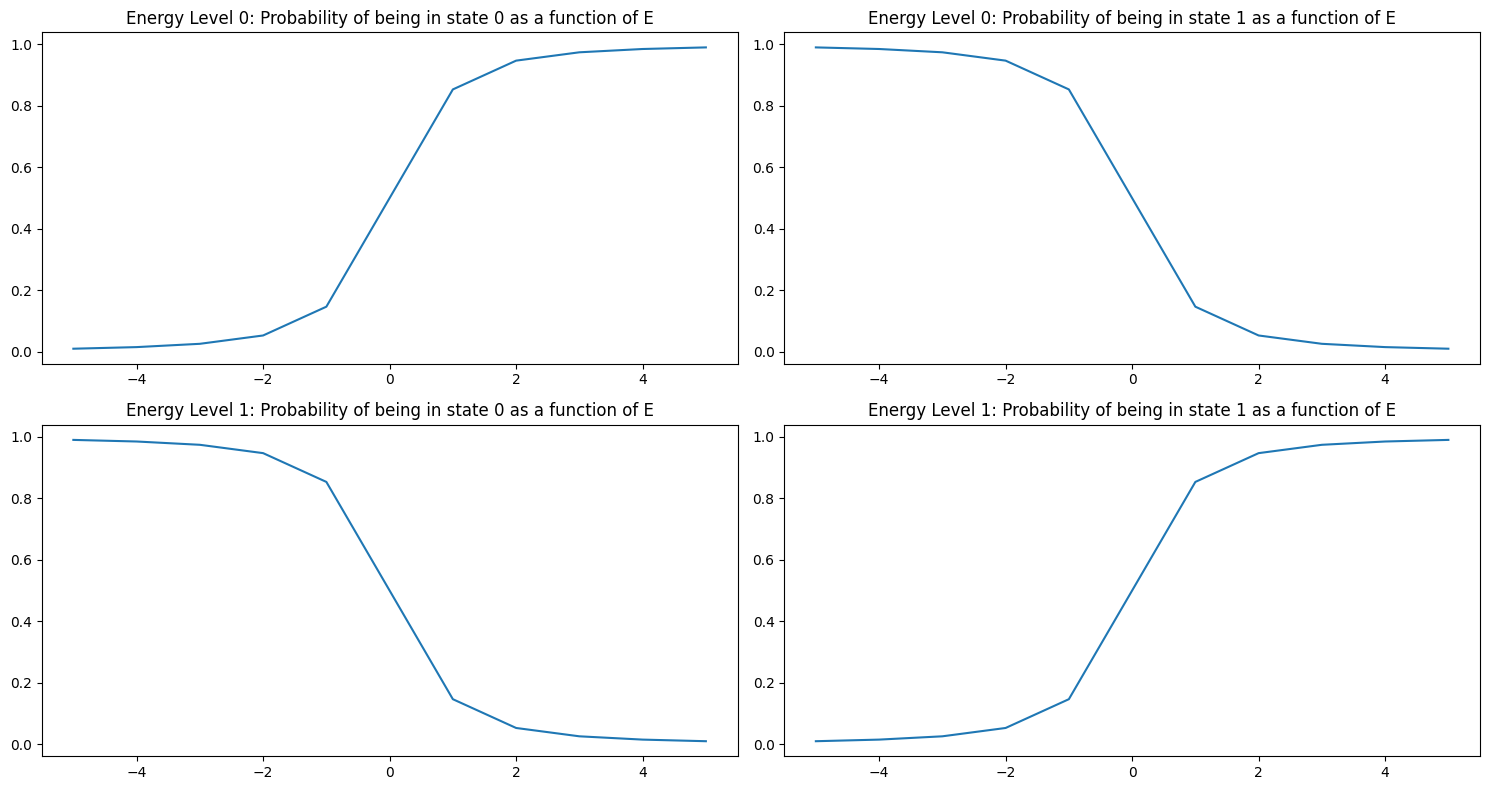

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for energy_level in [0, 1]:
    for state in [0, 1]:
        ax = axes[energy_level, state]
        ax.plot([e for e in E], [probability_matrix[energy_level][state](e, t) for e in E], '-')
        ax.set_title(f'Energy Level {energy_level}: Probability of being in state {state} as a function of E')
        
plt.tight_layout()

### Part B

In [2]:
# Physical Constants
hbar = 1.055e-34      # Js
q = 1.602e-19         # C
m = 9.1e-31           # kg
m_dot = 0.2 * m       # kg  
bohr_radii = 5.29e-11 # m
a = 1e-10             # m

In [3]:
def VQD(alpha, x1, x):
    return alpha * (x - x1) ** 2

def VDQD(alpha, x1, x2, x):
    return alpha * min((x - x1) ** 2, (x - x2) ** 2)

def VF(alpha, F, x1, x2, x):
    return alpha * min((x - x1) ** 2, (x - x2) ** 2) + F * x

def VFT(alpha, F, omega, x1, x2, x, t):
    return alpha * min((x - x1) ** 2, (x - x2) ** 2) + F * x * np.cos(omega * t)

In [4]:
def compute_eigenvalue_eigenstates(U):
    H = diags([off, on + U, off], [-1, 0, 1])
    W, V = np.linalg.eig(H.toarray())
    idx = W.argsort()[::1]
    W = W[idx]
    V = V[:, idx]
    return W, V

Recall for a 1D Quantum Harmonic Oscillator:
$$
    H = \frac{p^2}{2m} + \frac{1}{2}m\omega^2 x^2
$$,
hence $\alpha = \frac{1}{2} m \omega^2$
Using $\omega = \frac{E_1 - E_0}{\hbar}$, we can deduce that:
$$
\alpha = \frac{1}{2}m ( \frac{(E_1 - E_0)}{\hbar} )^2
$$
Assuming an energy gap of $4 meV$, we get an alpha value of $\approx 2.1 \frac{eV}{nm^2}$.

In [5]:
print(f'Alpha Estimate (Analytical): {1 / 2 * m_dot * (4 * 1e-3 * q / hbar) ** 2 * 1e-9 ** 2 / q :.2E} eV / nm^2') 

Alpha Estimate (Analytical): 2.10E-05 eV / nm^2


In [6]:
# Constants
Np = 700
X = a * np.linspace(-Np / 2, Np / 2, Np) / 1e-9  # nm
# divide by q to convert to eV, accounting for mass of quantum dot ~ 0.2 mass of electron
t0 = hbar ** 2 / (2 * m_dot * ((X[1] - X[0]) * 1e-9) ** 2) / q
on = 2.0 * t0 * np.ones(Np)
off = -t0 * np.ones(Np - 1)
alpha = 2.10e-5 
x1 = 0 # nm

#### Sweeping Potential Energy 

In [7]:
for pow in range(-5, 0):
    alpha_test = 10 ** pow
    U = np.array([VQD(alpha_test, x1,  x) for x in X])
    W, _ = compute_eigenvalue_eigenstates(U)
    print(f'Alpha {alpha_test:.2E} yields Energy Gap of {(W[1] - W[0]) / 1e-3 :.2f} meV')

Alpha 1.00E-05 yields Energy Gap of 2.78 meV
Alpha 1.00E-04 yields Energy Gap of 8.74 meV
Alpha 1.00E-03 yields Energy Gap of 27.63 meV
Alpha 1.00E-02 yields Energy Gap of 87.35 meV
Alpha 1.00E-01 yields Energy Gap of 276.06 meV


#### Computation for Energy Gap of 4meV

In [8]:
U = np.array([VQD(alpha, x1,  x) for x in X])
W, V = compute_eigenvalue_eigenstates(U)

In [9]:
print(f'Energy Gap: {(W[1] - W[0]) / 1e-3} meV')

Energy Gap: 4.004950513396867 meV


In [10]:
Psi0 = np.multiply(V[:, 0], V[:, 0])
Psi1 = np.multiply(V[:, 1], V[:, 1])

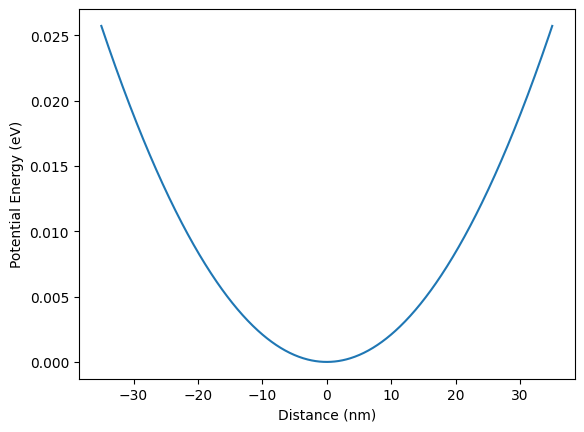

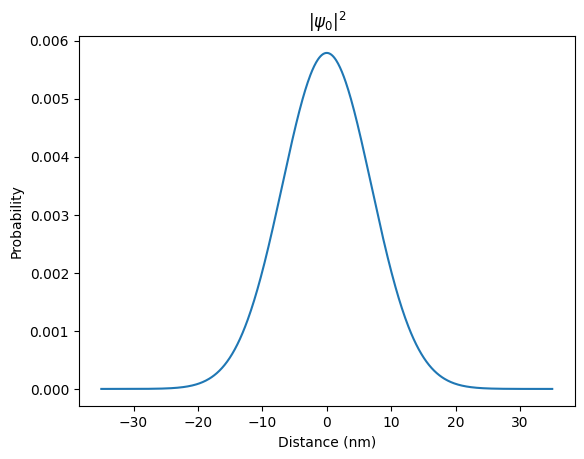

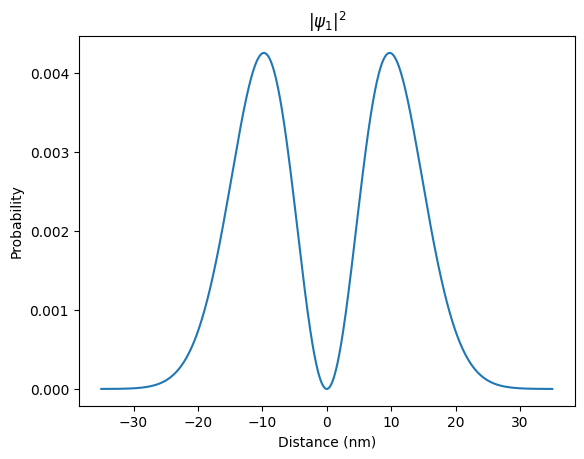

In [11]:
plt.figure(1)
plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.show()

plt.figure(2)
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title(r'$|\psi_0|^2$')
plt.show()

plt.figure(3)
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title(r'$|\psi_1|^2$')
plt.show()

In [12]:
def gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def fit_gaussian(x, y, p0):
    popt, _ = curve_fit(gauss, x, y, p0)
    return popt
A, mu, sigma = fit_gaussian(X, Psi0, [.01, 0, 3])
print(f'Number of Atoms Spanned: {2 * sigma * 1e-9 / 0.543e-9:.2F}')

Number of Atoms Spanned: 25.43


/home/roy/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


#### i)
Given the alpha is related to the potential energy of the gate, used the confined the electron, we can infer that alpha must be related to how the gate interacts with the material.

Thus factors that affect the value may include:
- Voltage applied by the gate
- Distance between gate and trapped electron (e.g. a thicker $SiO_2$ layer could affect alpha)
- The dimensions of the gate / how the voltage is spread out

Temperature range we expect for the device to work would be low (close to 0K), otherwise the thermal fluctuation may cause decoherence.
This is because higher temperature leads to more active electrons and atoms, which increase the likelihood of interaction, leading to decoherence.
Alternatively, high temperature may lead to the confined electrons from moving out of its confinement, thus destroying the ability of it actions as a qubit.
Additionally, $T << \hbar \omega$ (where $\hbar \omega$ is the energy between energy levels in a quantum harmonic oscillator) (this condition is necessary otherwise we wouldn't be able to distinguish between the different states).
  
#### ii)
Using Finite Difference method, the increment $\Delta x$ should be $1 \AA$, but due to limitation of floating point numbers, it tends to deviate slightly from this value, which affects the energy gap and length scale of wavefunction.

The simulation domain also affects the result. 
Due to the limitation of FDM, we are simulating both a particle in a finite potential well and a quantum harmonic oscillator.
This means the wave function is affected by both. 
To remedy this, I expanded the simulation domain until length scale and energy gap began to converge / remain constant (this occurred at $Np = 700$ and a domain between $-35nm$ and $35nm$.   

#### iii)
Quantum dots are called artificial atoms as they have discrete energy levels similar to how electrons do in an atom.
Length scale is 2$\sigma$ of a gaussian fitted on the probability density of being in ground.
Around 25.43 atoms can fit within the length scale (I fitted a Gaussian to the ground state wave function and took $2\sigma$ (2 times standard deviation) to be the length scale.



### Part C

In [13]:
def plot_graph(x, y, xlabel, ylabel, title, axis=None):
    if axis is not None:
        axis.plot(x, y)
        axis.set_xlabel(xlabel)
        axis.set_ylabel(ylabel)
        axis.set_title(title)
    else:
        plt.plot(x, y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)

In [14]:
def plot_graph_x(x, y, xlabel, ylabel, title, axis=None):
    if axis is not None:
        axis.plot(x, y, 'x')
        axis.set_xlabel(xlabel)
        axis.set_ylabel(ylabel)
        axis.set_title(title)
    else:
        plt.plot(x, y, 'x')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)

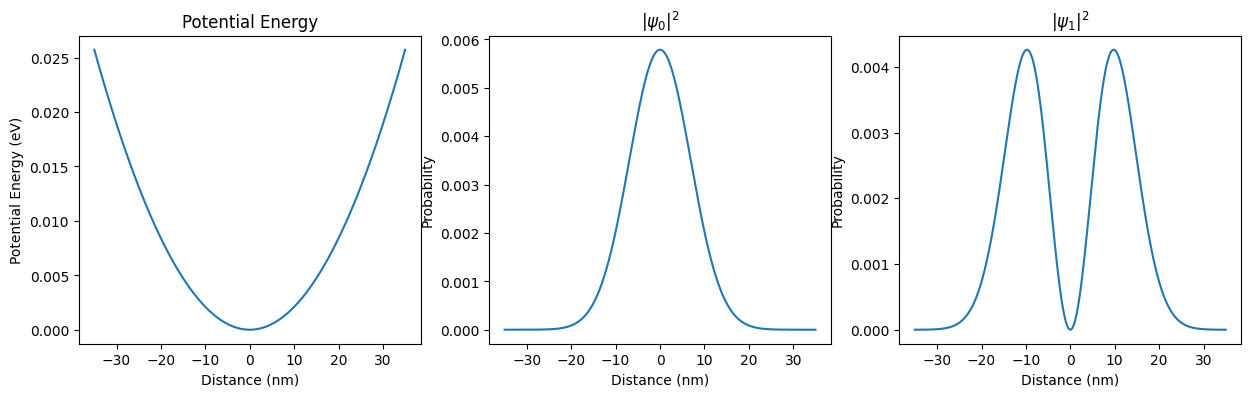

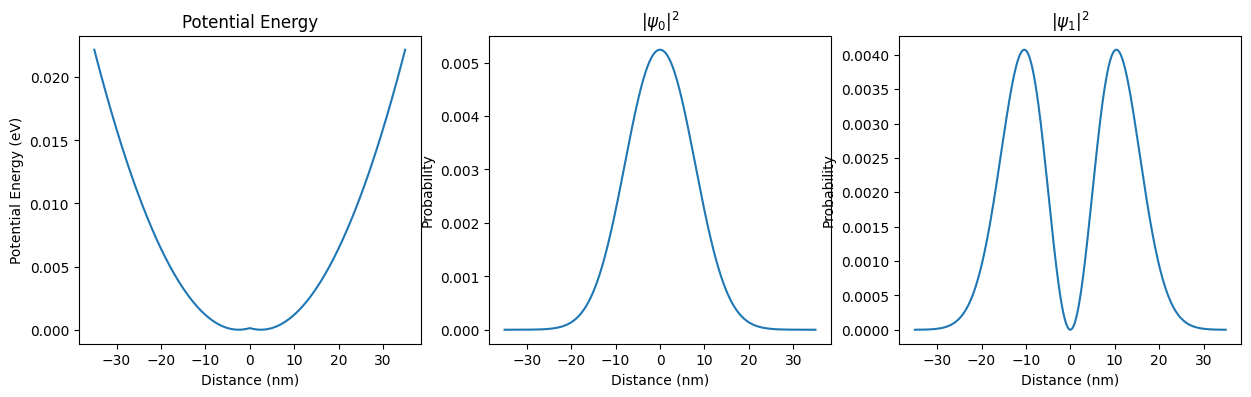

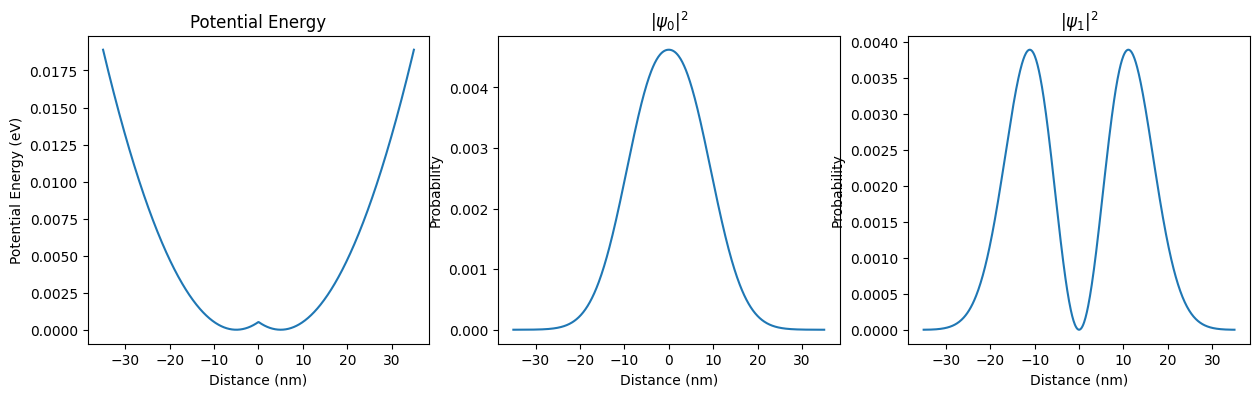

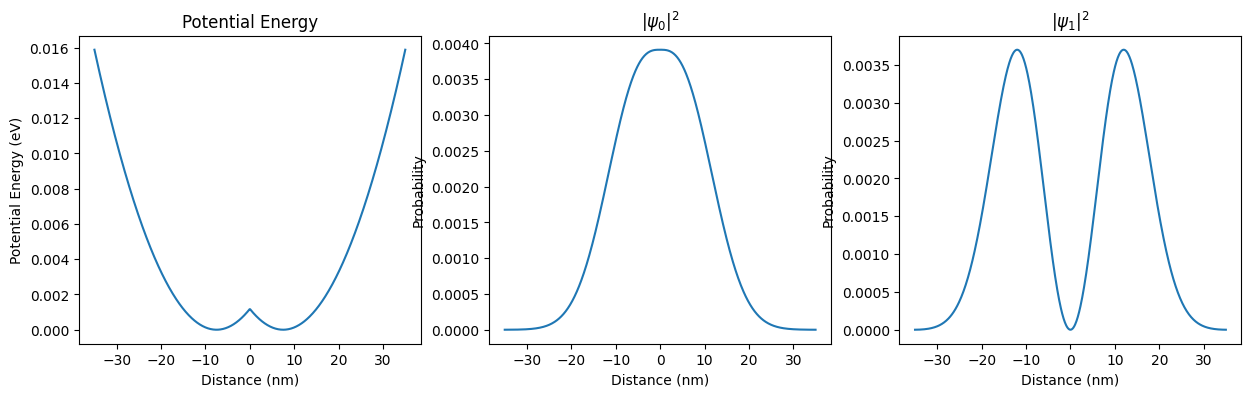

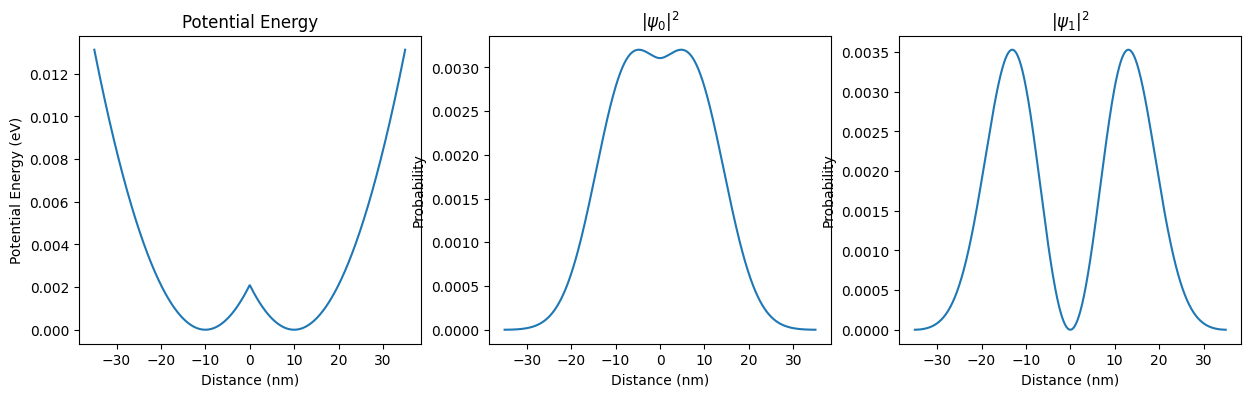

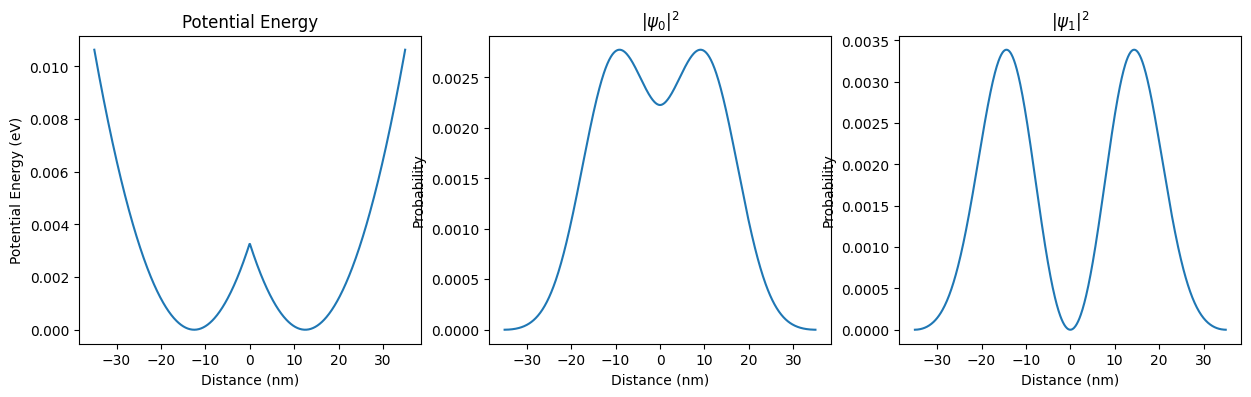

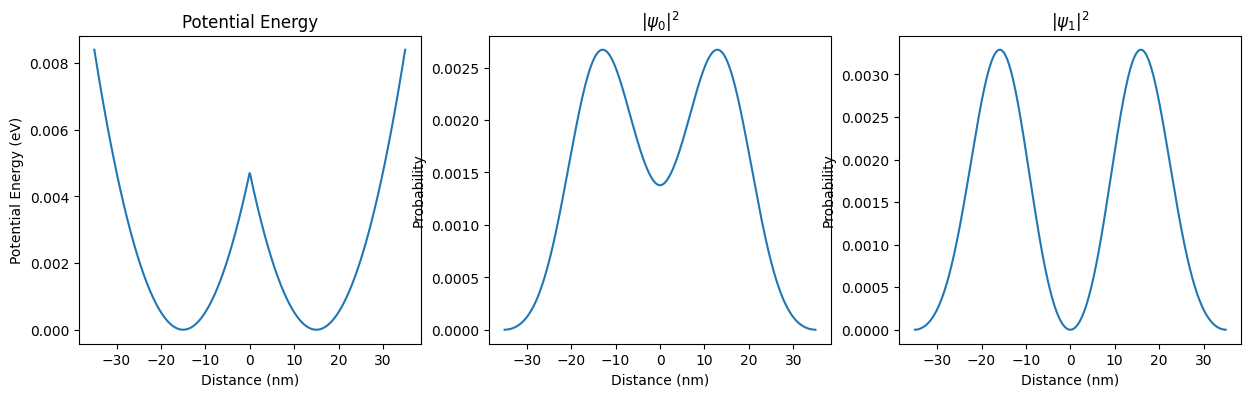

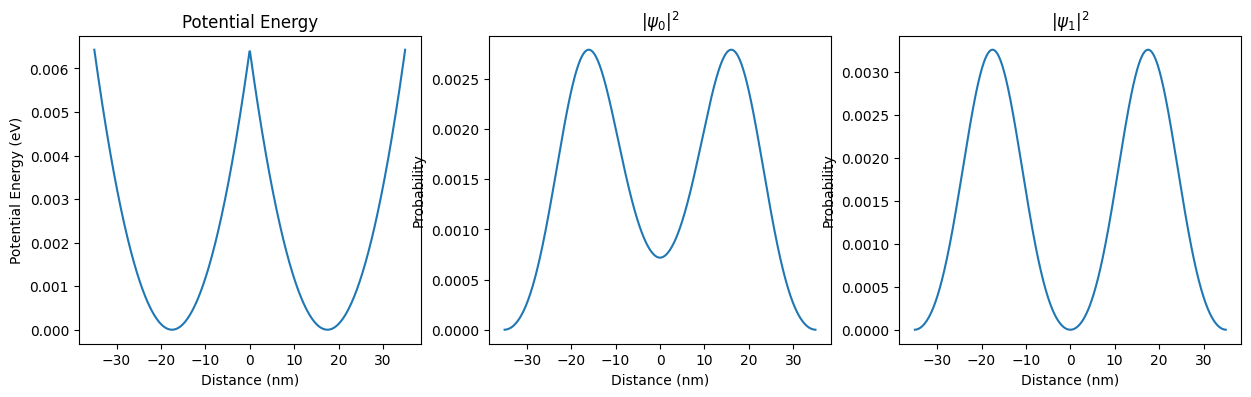

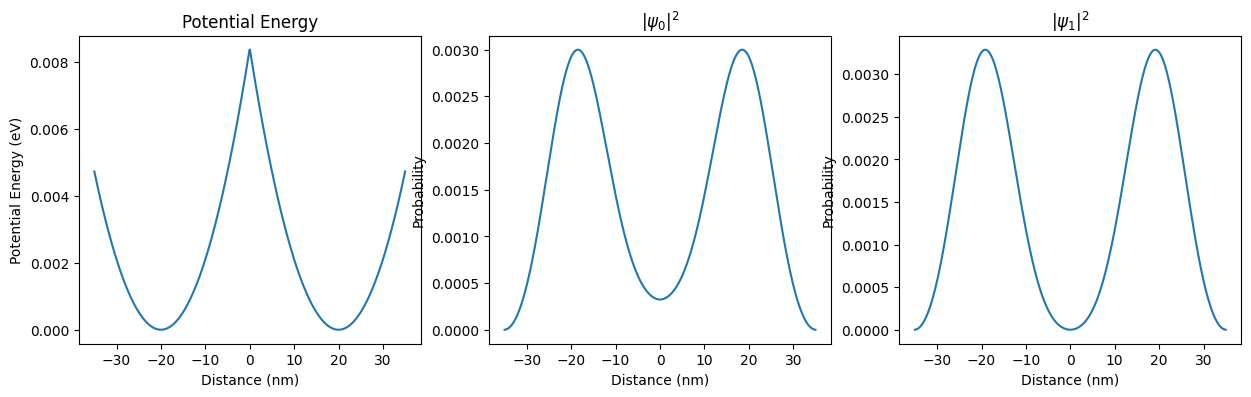

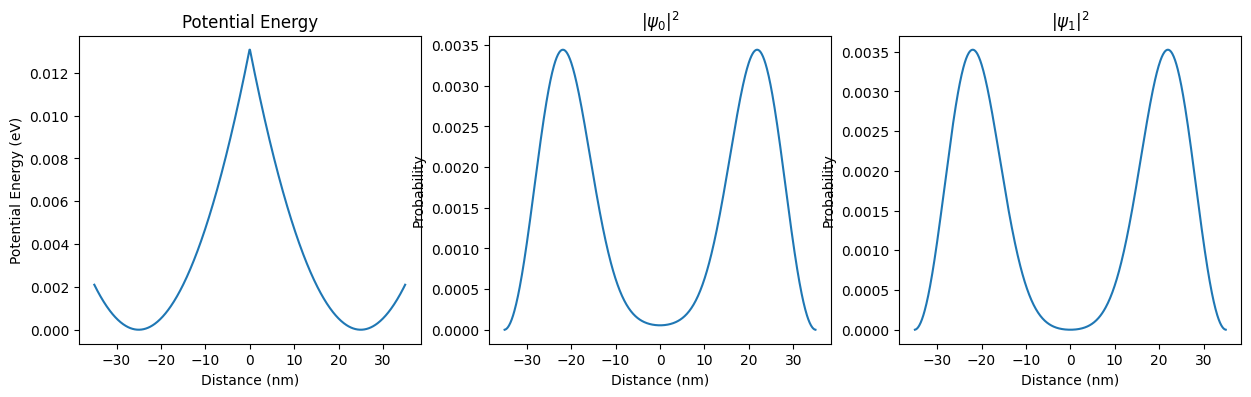

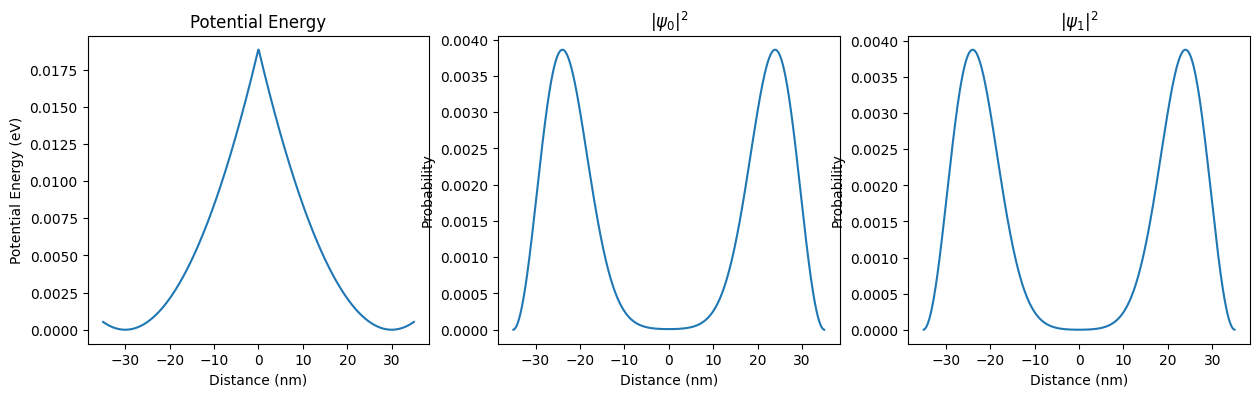

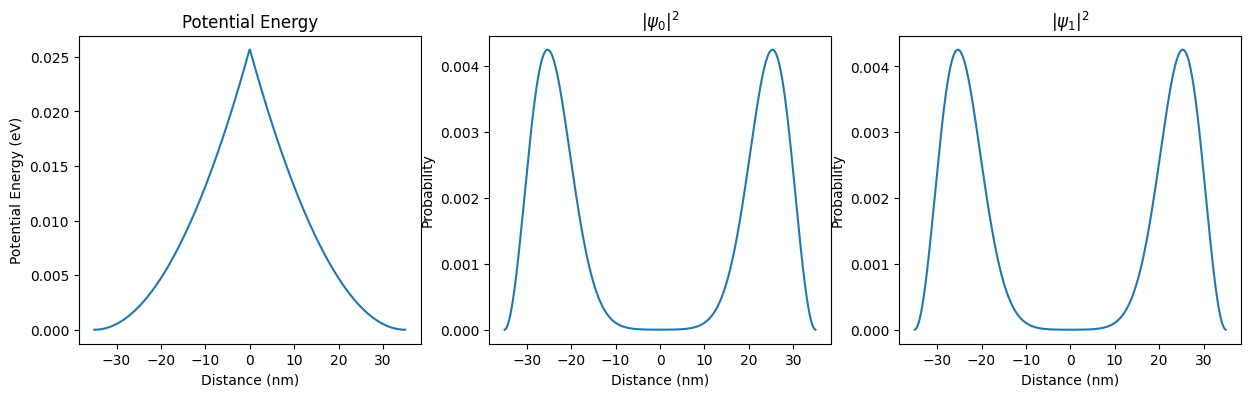

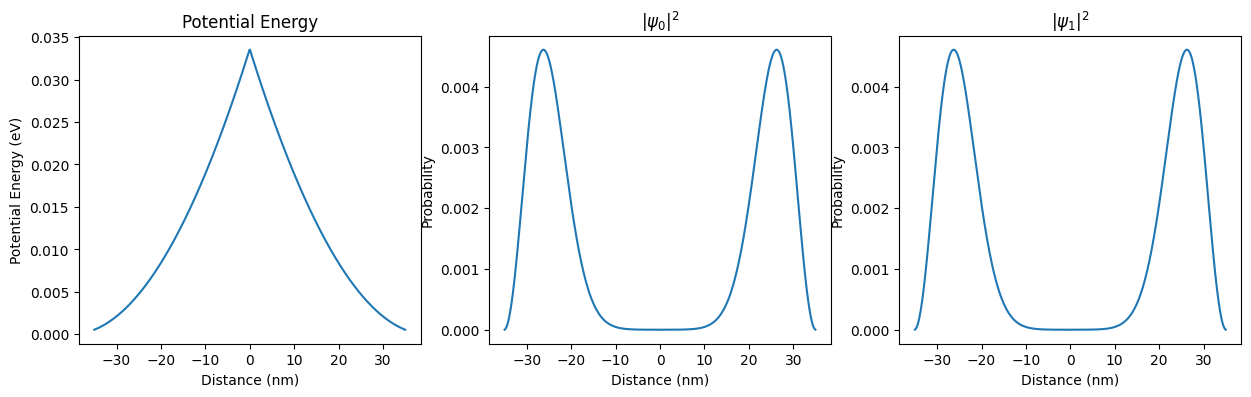

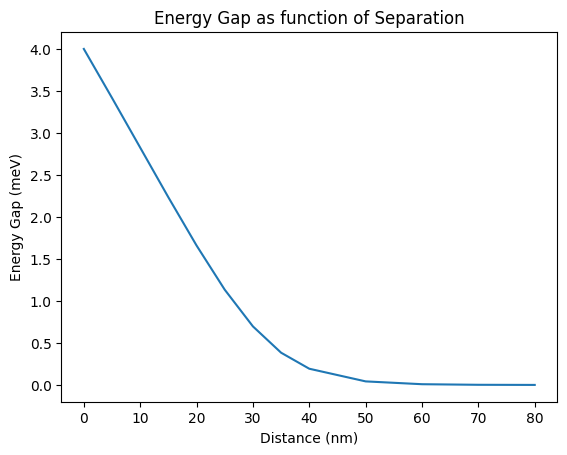

In [15]:
separation = []
energy_difference = []

for index, R in enumerate([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 25, 30, 35, 40]):
    x1 = R
    x2 = -R
    # Create Potential Energy and Probability Curves for 2 lowest energy state
    U = np.array([VDQD(alpha, x1, x2, x) for x in X])
    W, V = compute_eigenvalue_eigenstates(U)
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    Psi0 = np.multiply(V[:, 0], V[:, 0])
    Psi1 = np.multiply(V[:, 1], V[:, 1])
    plot_graph(X, U, 'Distance (nm)', 'Potential Energy (eV)', r'Potential Energy', axes[0])
    plot_graph(X, Psi0, 'Distance (nm)', 'Probability', r'$|\psi_0|^2$', axes[1])
    plot_graph(X, Psi1, 'Distance (nm)', 'Probability', r'$|\psi_1|^2$', axes[2])
    plt.show()

    # Create data for energy difference per centre-to-centre dot separation
    separation.append(2 * R)
    energy_difference.append((W[1] - W[0]) / 1e-3)

plot_graph(separation, energy_difference, 'Distance (nm)', 'Energy Gap (meV)', 'Energy Gap as function of Separation')

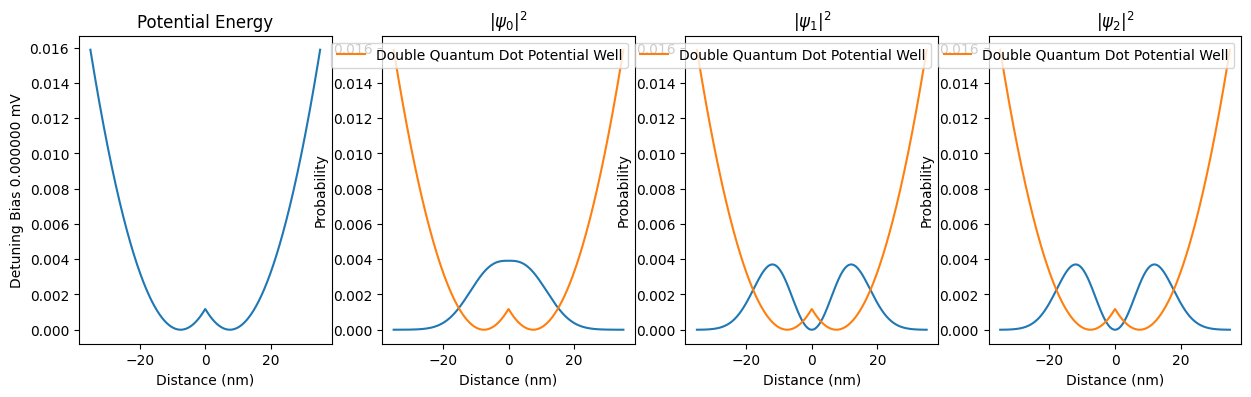

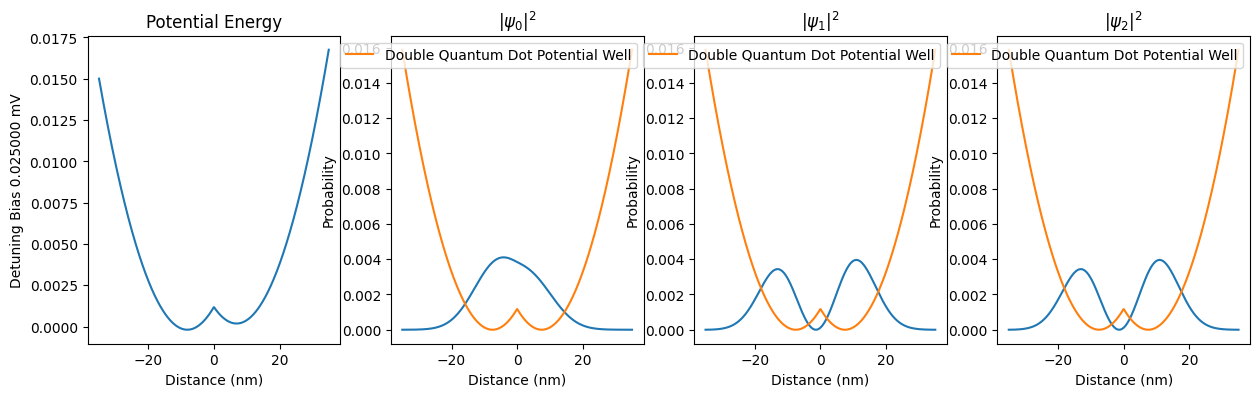

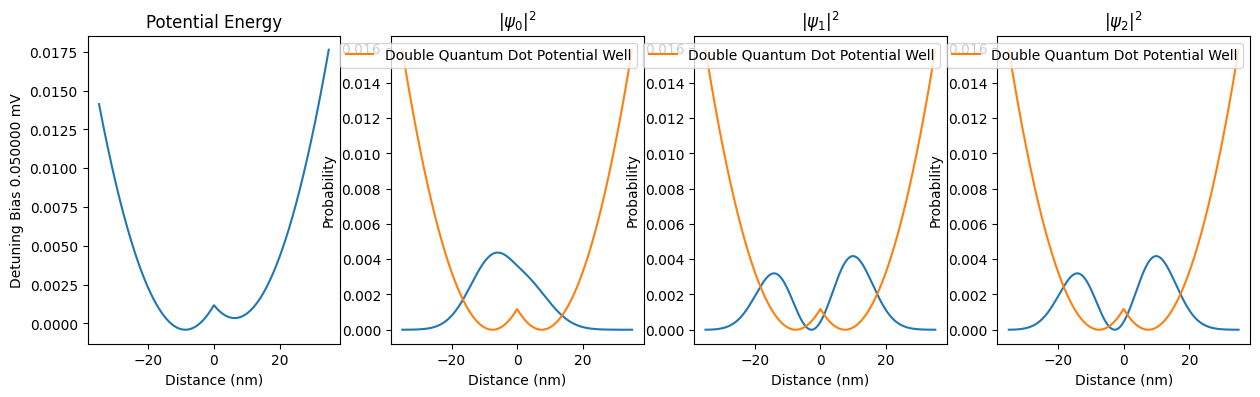

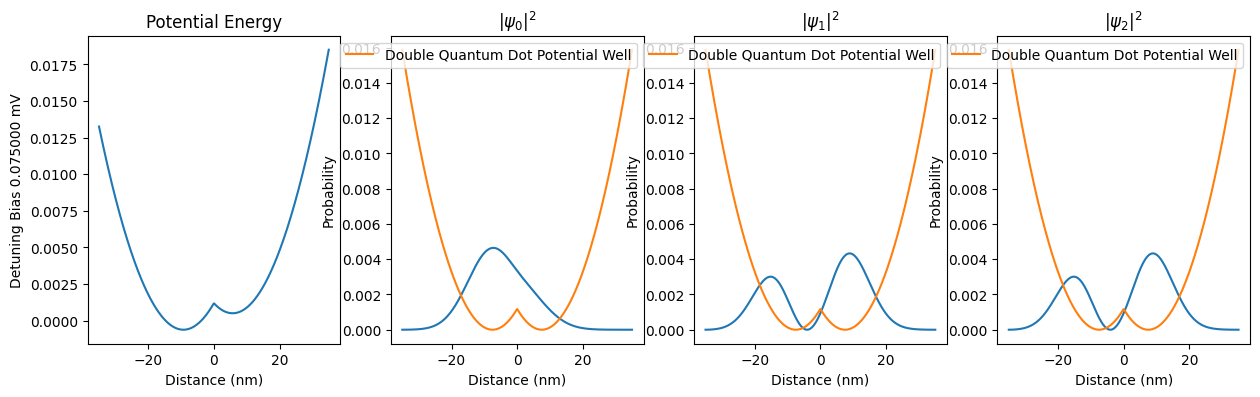

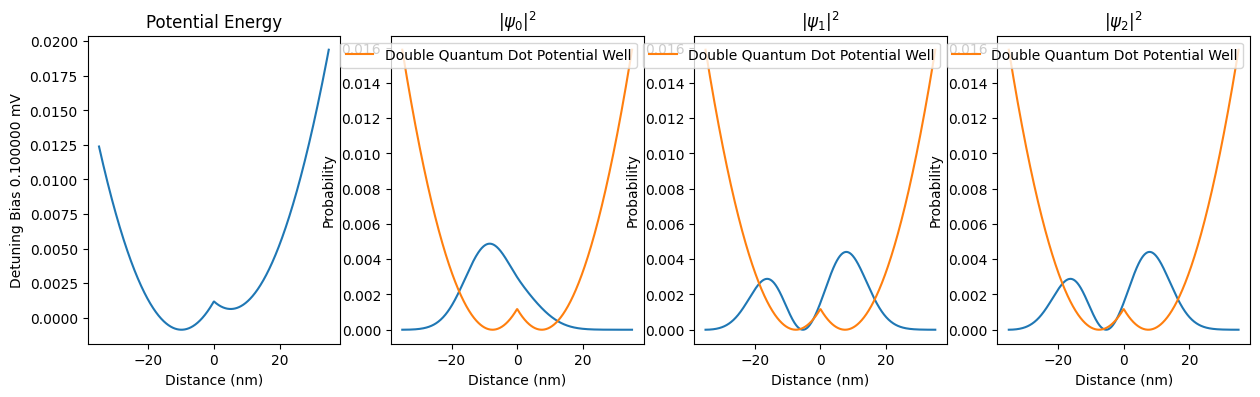

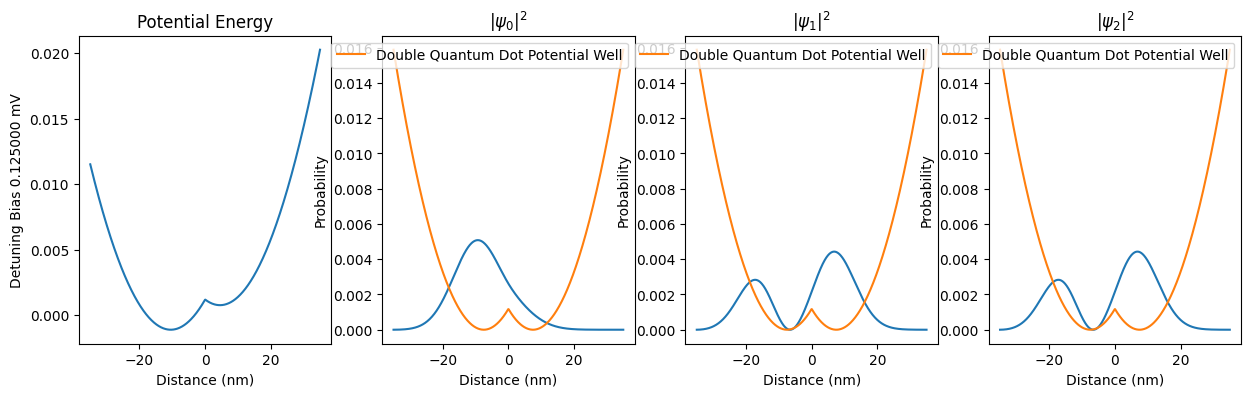

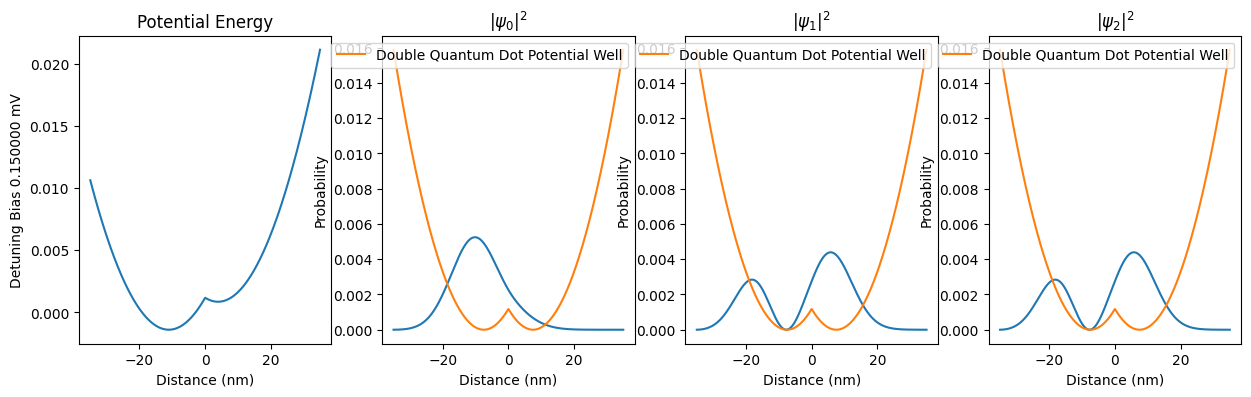

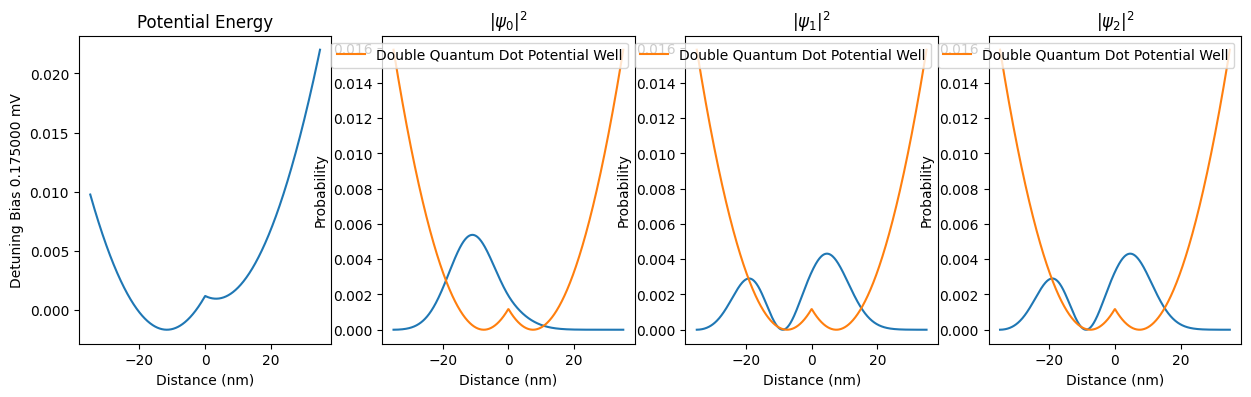

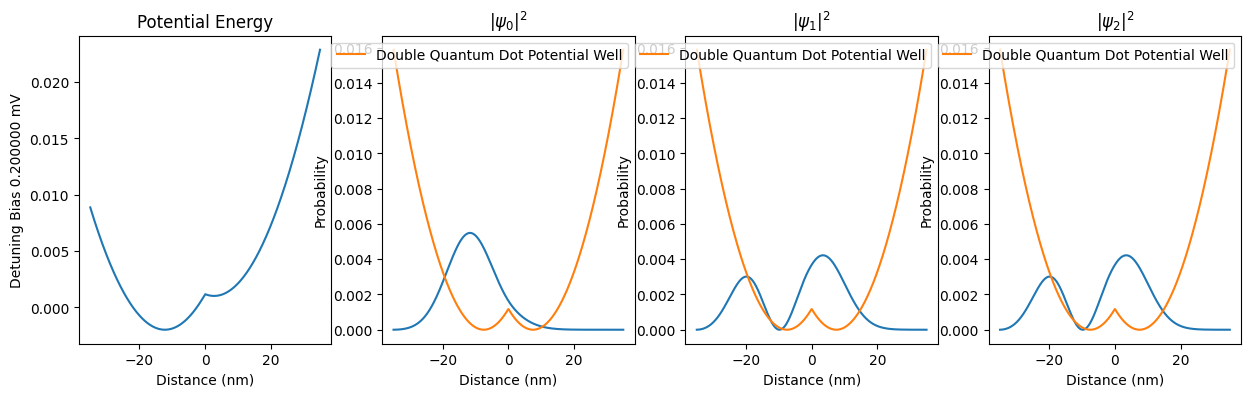

In [21]:
x1, x2 = 7.5, -7.5
FArray = np.arange(0, 20.1, 2.5) * 1e-5
eigen1 = np.array([])
eigen2 = np.array([])

for F in FArray:
    U = np.array([VF(alpha, F, x1, x2, x) for x in X])
    W, V = compute_eigenvalue_eigenstates(U)
    eigen1 = np.append(eigen1, W[0])
    eigen2 = np.append(eigen2, W[1])
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))
    Psi0 = np.multiply(V[:, 0], V[:, 0])
    Psi1 = np.multiply(V[:, 1], V[:, 1])
    plot_graph(X, U, 'Distance (nm)', f'Detuning Bias {F / 1e-3 :2F} mV', r'Potential Energy', axes[0])
    plot_graph(X, Psi0, 'Distance (nm)', 'Probability', r'$|\psi_0|^2$', axes[1])
    plot_graph(X, Psi1, 'Distance (nm)', 'Probability', r'$|\psi_1|^2$', axes[2])
    plot_graph(X, Psi1, 'Distance (nm)', 'Probability', r'$|\psi_2|^2$', axes[3])
    axes[1].plot(X, np.array([VDQD(alpha, x1, x2, x) for x in X]), label='Double Quantum Dot Potential Well')
    axes[2].plot(X, np.array([VDQD(alpha, x1, x2, x) for x in X]), label='Double Quantum Dot Potential Well')
    axes[3].plot(X, np.array([VDQD(alpha, x1, x2, x) for x in X]), label='Double Quantum Dot Potential Well')
    axes[1].legend()
    axes[2].legend()
    axes[3].legend()
    plt.show()
    

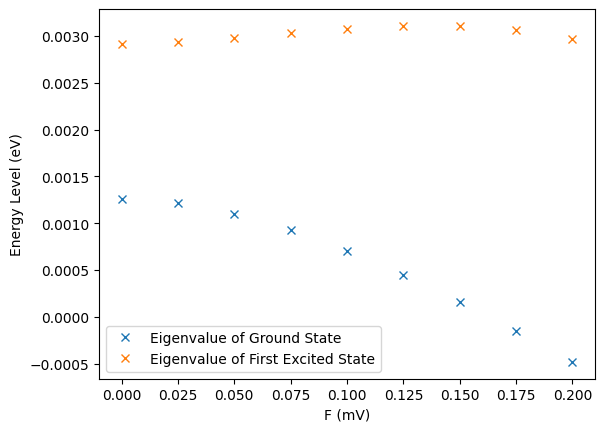

In [18]:
plt.plot(FArray / 1e-3, eigen1, 'x', label='Eigenvalue of Ground State')
plt.plot(FArray / 1e-3, eigen2, 'x', label='Eigenvalue of First Excited State')
plt.ylabel('Energy Level (eV)')
plt.xlabel('F (mV)')
plt.legend()

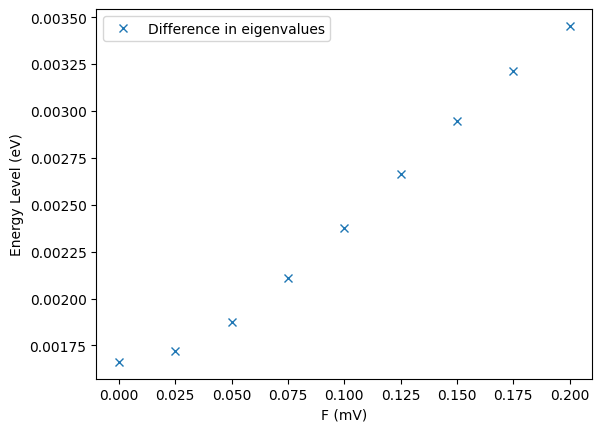

In [19]:
plt.plot(FArray / 1e-3, eigen2 - eigen1, 'x', label='Difference in eigenvalues')
plt.ylabel('Energy Level (eV)')
plt.xlabel('F (mV)')
plt.legend()

#### i)
The probability density for the ground state goes from uni-modal to bi-modal as the separation distance $R$ increases (i.e. becomes more similar to the first excited state).
The probability density for the first excited state doesn't go through much change.
This is reflected in the energy gap, when the gap is large, the probability density for ground and first excited state are dissimilar and gradually become more similar as the energy gap decreases.


##### ii)
Energy gap between the first two energy states decrease as separation $R$ increases, eventually plateauing around 50-60nm. 

# TODO Figure out hamiltonian paramter
The Hamiltonian parameter is modified by the separation between dots would tbe entries in the diagonal
  
Dot separation is physically represented by the separation of the gates used to create the quantum dots.
There is an optimal separation for double quantum dots.
If the separation is too small, then it becomes difficult to determine the position of the electron (i.e difficult to get a read-out).
If the separation is too high, then the electron will no longer be in a state of superposition between the left and right gate, meaning it difficult to use as qubit.
This means we need to find an optimal separation whereby the first two energy states are sufficiently separated from the other energy states while also ensuring it has the properties that we need.  
  
##### iii)
When the sign of $F$ changes, the probability density function shifts in the opposite direction (i.e. the most probably position of the electron will move from the right to the left and vice versa when $F$ changes signs).
For instance, a positive $F$ encourages electrons to the left of the centre of the dot, while a negative $F$ encourages electrons to move to the right side.

It appears that the energy gap between the lowest energy as the magnitude of $F$ increases.
# TODO How this relates to analytic solution from A
From A, the energy difference is only dependent on the coupling terms $t$ and $t*$.
This means that $F$ affects $t$ in our Hamiltonian.

# TODO figure out range
Values for $F$ where a qubit can operate is between 0 and 0.1 mV/m.
The value for $F$ must ensure that the electron remains in a state of superposition between the right and left gate (i.e. we need to ensure that all the peaks for a wave function aren't all on one side of potential well, i.e. we want the electrons to be in a superposition between left and right gate).   
The range can be visually inferred by looking at how the wave function behaves, specifically we ensure that the wave function doesn't favour one side of the well to heavily.

#### Part D

#### i) 

To achieve convergence, I tried different values of $F$ (range is mentioned in in Part C) iii)) and verified that   

## Conclusion